@Author: Sushant Das
@Date: 14-10-2024
@Last Modified by: Sushant Das
@Last Modified time: 14-10-2024
@Title: Based on given users data like his work area, qualification, marrital status,
predicted whether user will make more than 50k a year or not.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split 

In [2]:
columns = ['age', 'work-area', 'unique-id', 'qualification', 'qualification-num', 'marital-status', 'occupation', 'relationship', 
           'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']

classification_df = pd.read_csv("datasets/classification_2.csv", header=None, names=columns)
classification_df.head()

,age,work-area,unique-id,qualification,qualification-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
classification_df.shape

(32561, 15)

In [4]:
classification_df.describe()

,age,unique-id,qualification-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
(classification_df['work-area'] == ' ?').sum()

1836

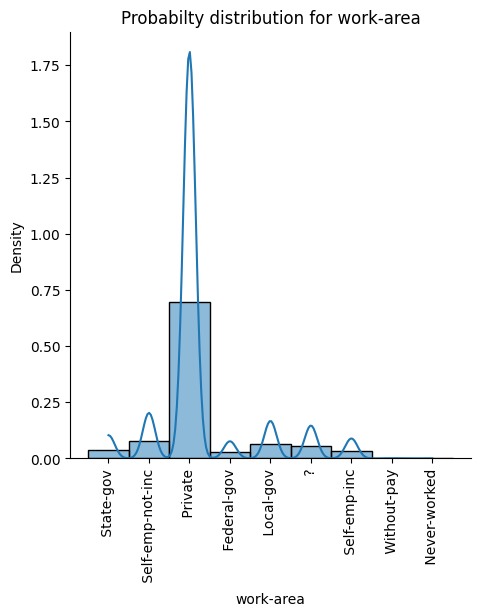

In [6]:
sns.displot(classification_df['work-area'], kde = True, stat='density')
plt.title("Probabilty distribution for work-area")
plt.xticks(rotation=90)
plt.show()

In [7]:
classification_df.replace(' ?', classification_df['work-area'].mode()[0], inplace=True)

In [8]:
(classification_df['work-area'] == ' ?').sum()

0

In [9]:
col_list=list(classification_df.columns)

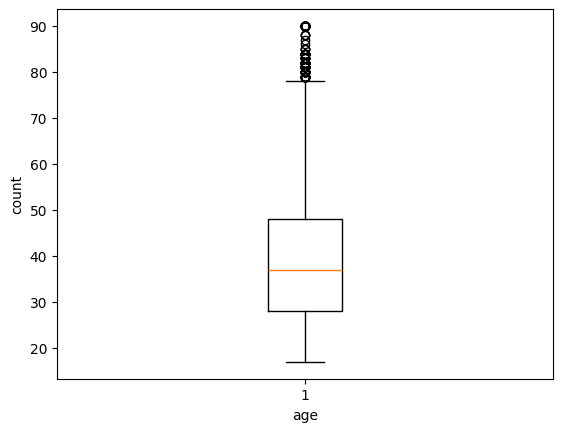

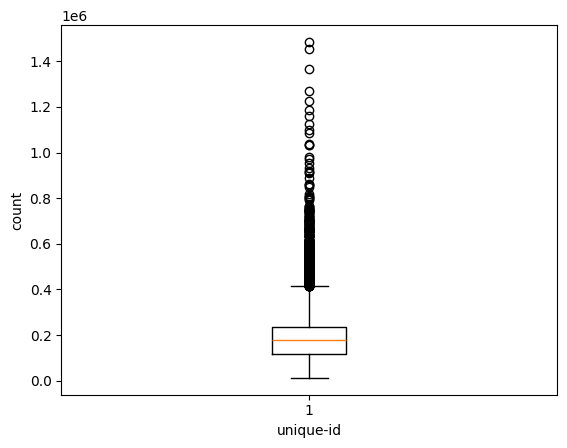

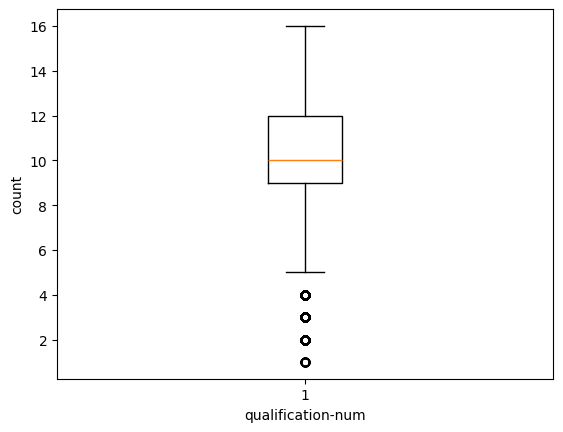

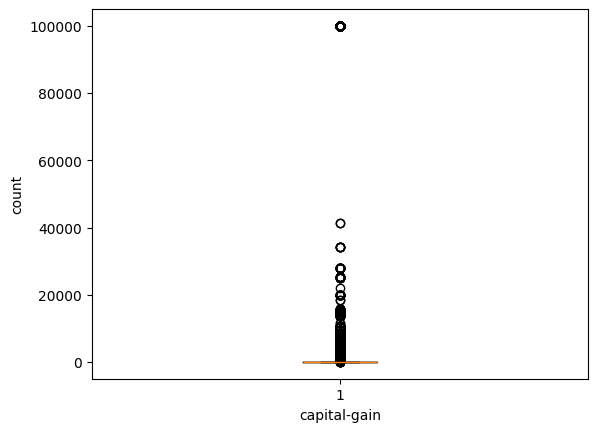

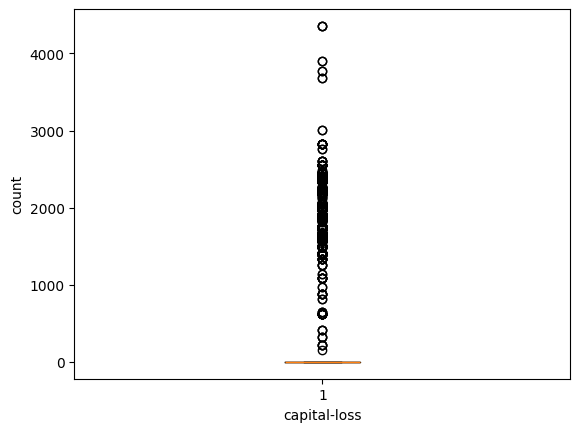

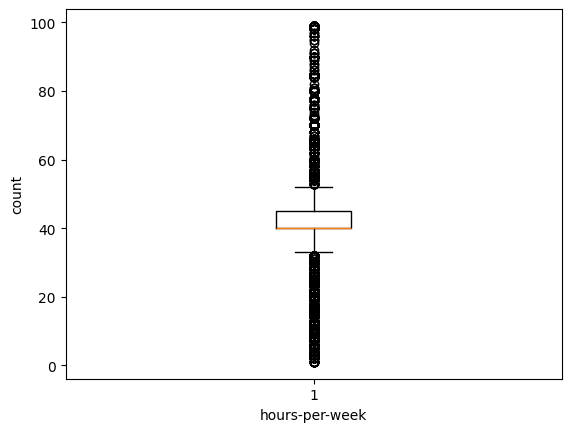

In [10]:
for i in col_list:
    if classification_df[i].dtypes==object:
        pass
    else:
        plt.boxplot(classification_df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [11]:
numeric_cols = classification_df.select_dtypes(include=['number'])

q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

print(iqr)

age                      20.0
unique-id            119224.0
qualification-num         3.0
capital-gain              0.0
capital-loss              0.0
hours-per-week            5.0
dtype: float64


In [12]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Filter the DataFrame to remove rows with any outliers
bank_df = classification_df[~outlier_mask.any(axis=1)]

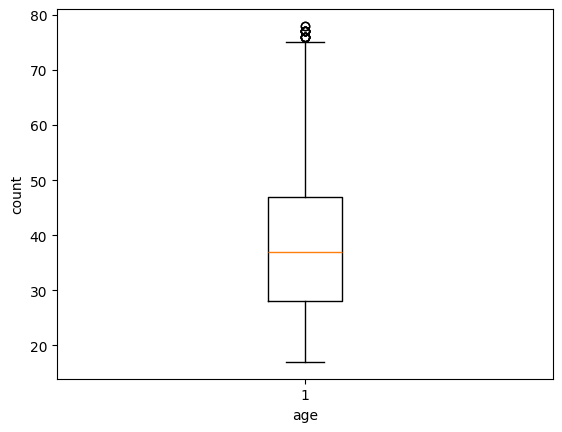

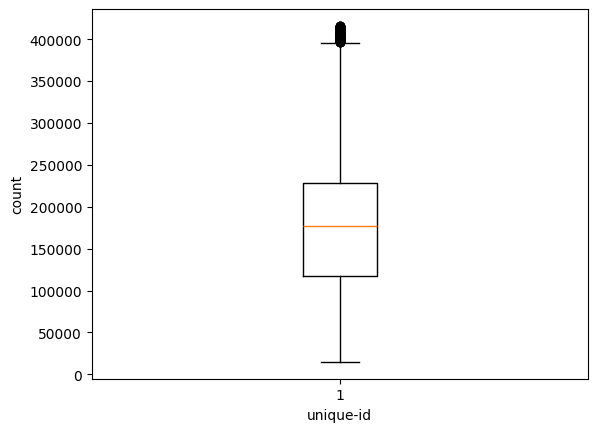

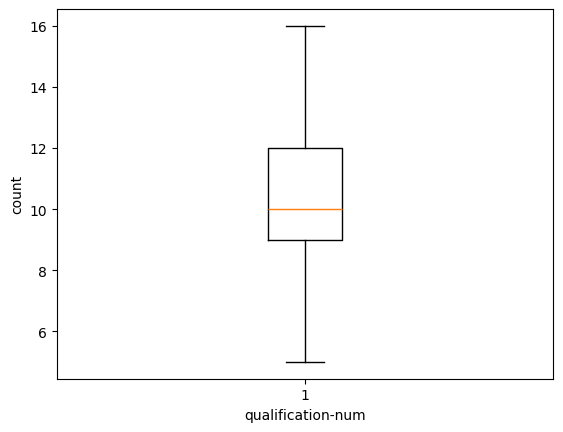

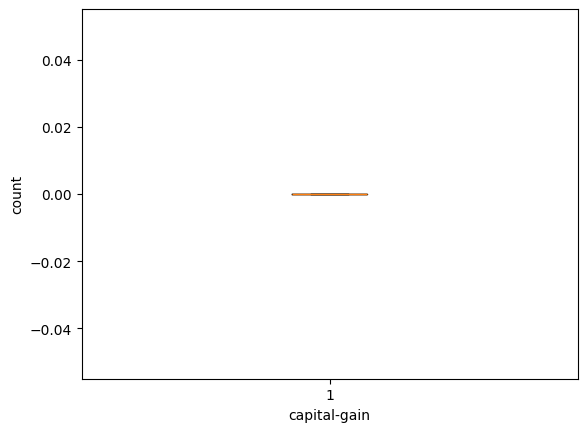

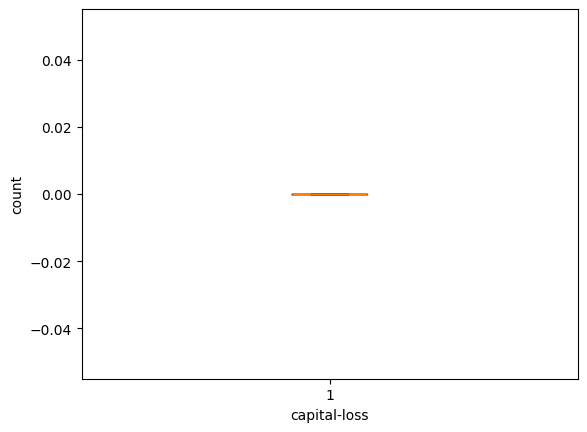

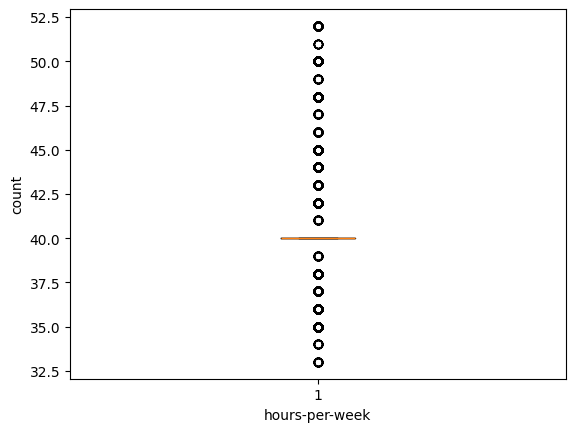

In [13]:
for i in col_list:
    if classification_df[i].dtypes==object:
        pass
    else:
        plt.boxplot(bank_df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [14]:
col_list=[]
for i in bank_df.columns:
    if((bank_df[i].dtypes=='object')&(i!='income')):
        col_list.append(i)

In [15]:
col_list

['work-area',
 'qualification',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'country']

In [16]:
labelencoder=LabelEncoder()

In [17]:
for i in col_list:
    classification_df[i]=labelencoder.fit_transform(classification_df[i])

In [18]:
classification_df

,age,work-area,unique-id,qualification,qualification-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,<=50K
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,39,>50K
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,39,<=50K
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,39,<=50K


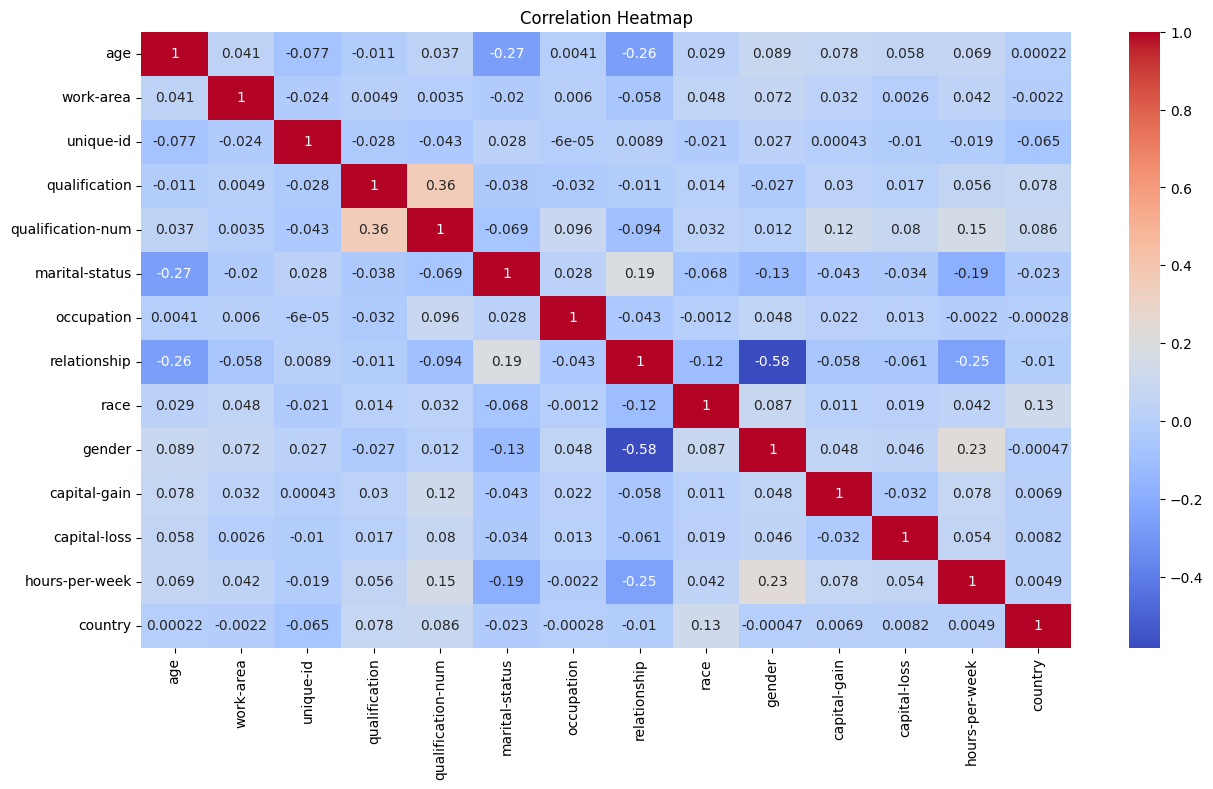

In [19]:
numeric_cols = classification_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
fig = plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
x = classification_df.drop(columns=['income'])
y = classification_df['income']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train_scaled, y_train)  

KNeighborsClassifier()

In [24]:
y_pred= classifier.predict(x_test_scaled)  

In [25]:
from sklearn.metrics import confusion_matrix  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8369415016121603


In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[4503  439]
 [ 623  948]]


In [27]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4942
        >50K       0.68      0.60      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.83      6513

